In [1]:
     #################### WEEK 4 #################### PROJECT  ####################### 

In [2]:
import numpy as np
import pandas as pd

In [3]:
country = pd.read_csv("D:\IMP DOC\Metadata_Country.csv")
population = pd.read_csv("D:\IMP DOC\country_population.csv")
fertility = pd.read_csv("D:/IMP DOC/fertility_rate.csv")
life_expectency = pd.read_csv("D:\IMP DOC\life_expectancy.csv")

In [4]:
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [5]:
country = country[['Country Code','Region']]
country.shape

(263, 2)

In [6]:
country.isna().sum()

Country Code     0
Region          46
dtype: int64

In [7]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [8]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [9]:
years = [str(i) for i in range(1960,2017)]

In [10]:
population.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [11]:
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [12]:
population.shape

(264, 59)

In [13]:
population.dropna(axis=0, inplace=True)

In [14]:
population.shape

(258, 59)

In [15]:
df = pd.melt(population,
             id_vars ='Country Code',
             value_vars = years,
             var_name ='Year',
             value_name = 'Population'
             )

df.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [16]:
df.isna().sum()

Country Code    0
Year            0
Population      0
dtype: int64

In [17]:
df.tail()

,Country Code,Year,Population
14701,XKX,2016,1816200.0
14702,YEM,2016,27584213.0
14703,ZAF,2016,56015473.0
14704,ZMB,2016,16591390.0
14705,ZWE,2016,16150362.0


In [18]:
df['Country Code'].value_counts()

ABW    57
PYF    57
MWI    57
MYS    57
NAC    57
       ..
GUY    57
HIC    57
HKG    57
HND    57
ZWE    57
Name: Country Code, Length: 258, dtype: int64

In [19]:
df.shape

(14706, 3)

In [20]:
258 * 57

14706

In [21]:
df.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [22]:
country.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [23]:
df_merged = pd.merge(country,df,how='left',on='Country Code')
df_merged.head()

,Country Code,Region,Year,Population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


In [24]:
df_merged.shape

(14711, 4)

In [25]:
life_expectency.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
life_expectency.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [27]:
life_expectency.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
life_expectency.dropna(axis=0, inplace=True)

In [29]:
df_2 = pd.melt(life_expectency,
             id_vars ='Country Code',
             value_vars = years,
             var_name ='Year',
             value_name = 'life_expectency'
             )

df_2.head()

,Country Code,Year,life_expectency
0,ABW,1960,65.662000
1,AFG,1960,32.292000
2,AGO,1960,33.251000
3,ALB,1960,62.279000
4,ARB,1960,46.825065


In [30]:
df_2.shape

(13395, 3)

In [31]:
df_merged.head()

,Country Code,Region,Year,Population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


In [32]:
df_merged.shape

(14711, 4)

In [33]:
df_merged_2 = pd.merge(df_merged,df_2,how='left',on=['Country Code','Year'])
df_merged_2.head()

,Country Code,Region,Year,Population,life_expectency
0,ABW,Latin America & Caribbean,1960,54211.0,65.662
1,ABW,Latin America & Caribbean,1961,55438.0,66.074
2,ABW,Latin America & Caribbean,1962,56225.0,66.444
3,ABW,Latin America & Caribbean,1963,56695.0,66.787
4,ABW,Latin America & Caribbean,1964,57032.0,67.113


In [34]:
df_merged_2.shape

(14711, 5)

In [35]:
fertility.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
fertility.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [37]:
fertility.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,7.478,7.524,7.563,7.592,7.611,7.619,7.618,7.613,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
fertility.dropna(axis=0, inplace=True)

In [39]:
df_3 = pd.melt(life_expectency,
             id_vars ='Country Code',
             value_vars = years,
             var_name ='Year',
             value_name = 'fertility'
             )

df_3.head()

,Country Code,Year,fertility
0,ABW,1960,65.662000
1,AFG,1960,32.292000
2,AGO,1960,33.251000
3,ALB,1960,62.279000
4,ARB,1960,46.825065


In [40]:
df_3.shape

(13395, 3)

In [41]:
df_merged.head()

,Country Code,Region,Year,Population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


In [42]:
df_merged_3 = pd.merge(df_merged,df_3,how='left',on=['Country Code','Year'])
df_merged_3.head()

,Country Code,Region,Year,Population,fertility
0,ABW,Latin America & Caribbean,1960,54211.0,65.662
1,ABW,Latin America & Caribbean,1961,55438.0,66.074
2,ABW,Latin America & Caribbean,1962,56225.0,66.444
3,ABW,Latin America & Caribbean,1963,56695.0,66.787
4,ABW,Latin America & Caribbean,1964,57032.0,67.113


In [43]:
df_merged_3.shape

(14711, 5)

In [44]:
   ####### VISUALIZATION #####

<Axes: >

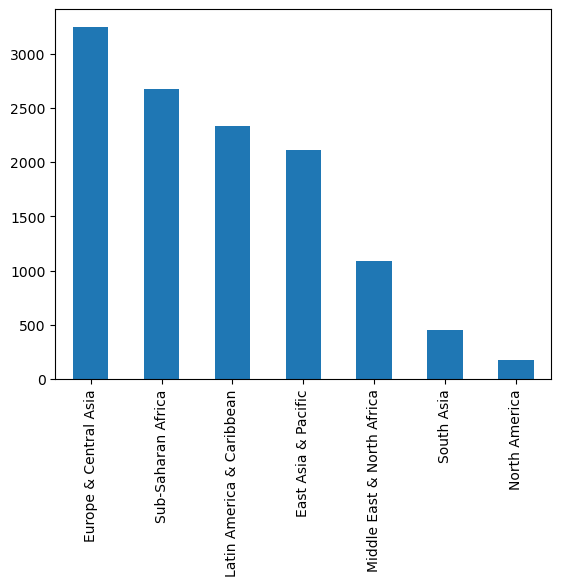

In [45]:
df_merged_3['Region'].value_counts().plot(kind='bar')

<Axes: ylabel='Region'>

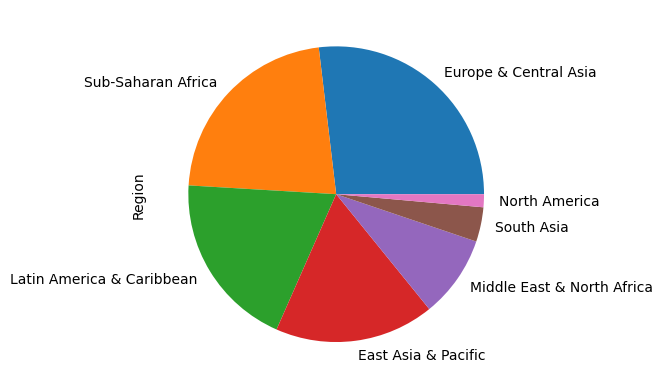

In [46]:
df_merged_3['Region'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

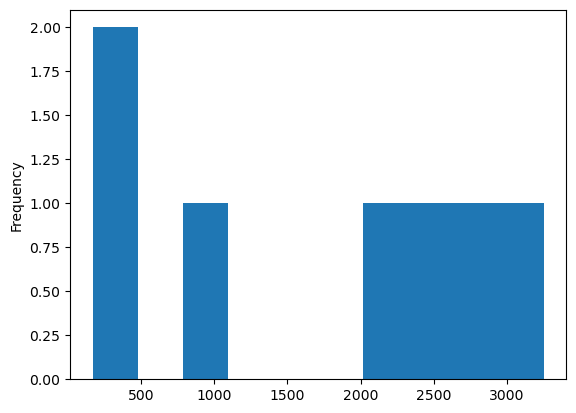

In [47]:
df_merged_3['Region'].value_counts().plot(kind='hist')

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

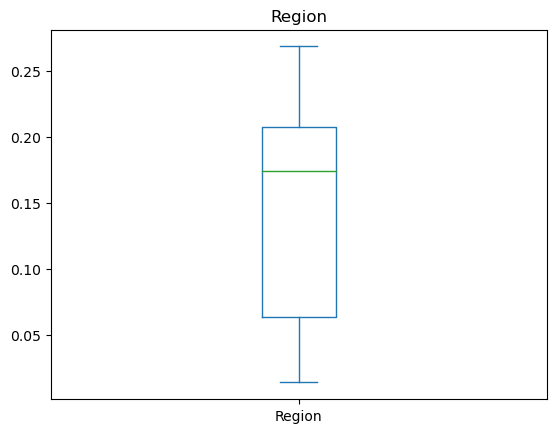

In [49]:
df_merged_3["Region"].value_counts(normalize=True).plot.box(layout=(10,10),title='Region')
plt.show()

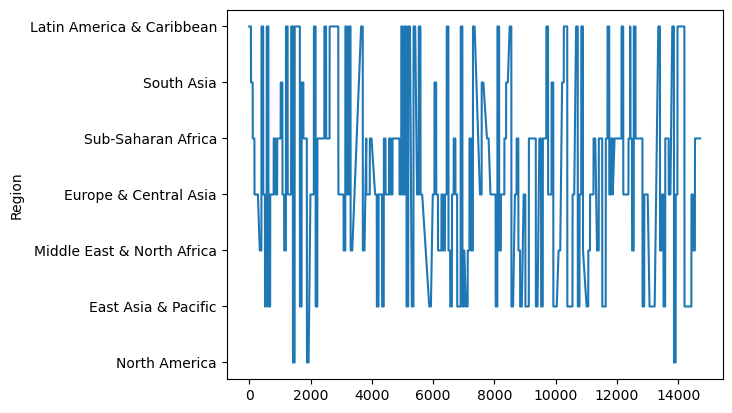

In [52]:
sns.lineplot(df_merged_3["Region"])
plt.show()


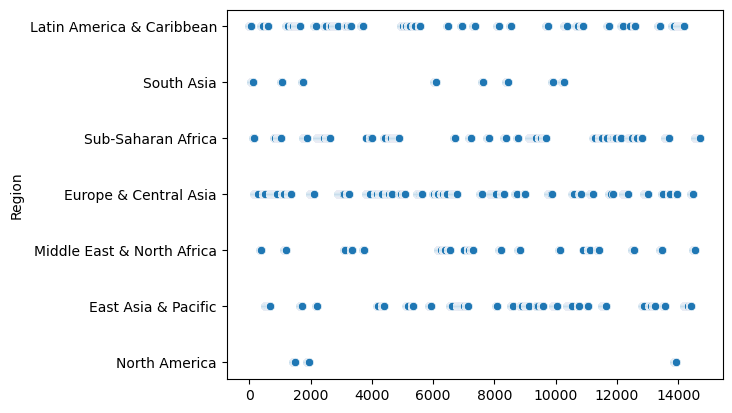

In [51]:
sns.scatterplot(df_merged_3["Region"])
plt.show()

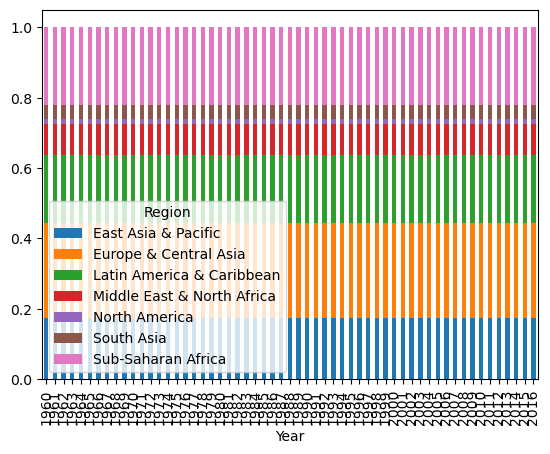

In [53]:
#crosstab comparision
Heating=pd.crosstab(df_merged_3["Year"],df_merged_3["Region"])
Heating.div(Heating.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

C:\Users\ns118\AppData\Local\Temp\ipykernel_13292\286741413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=df_merged_3.corr()


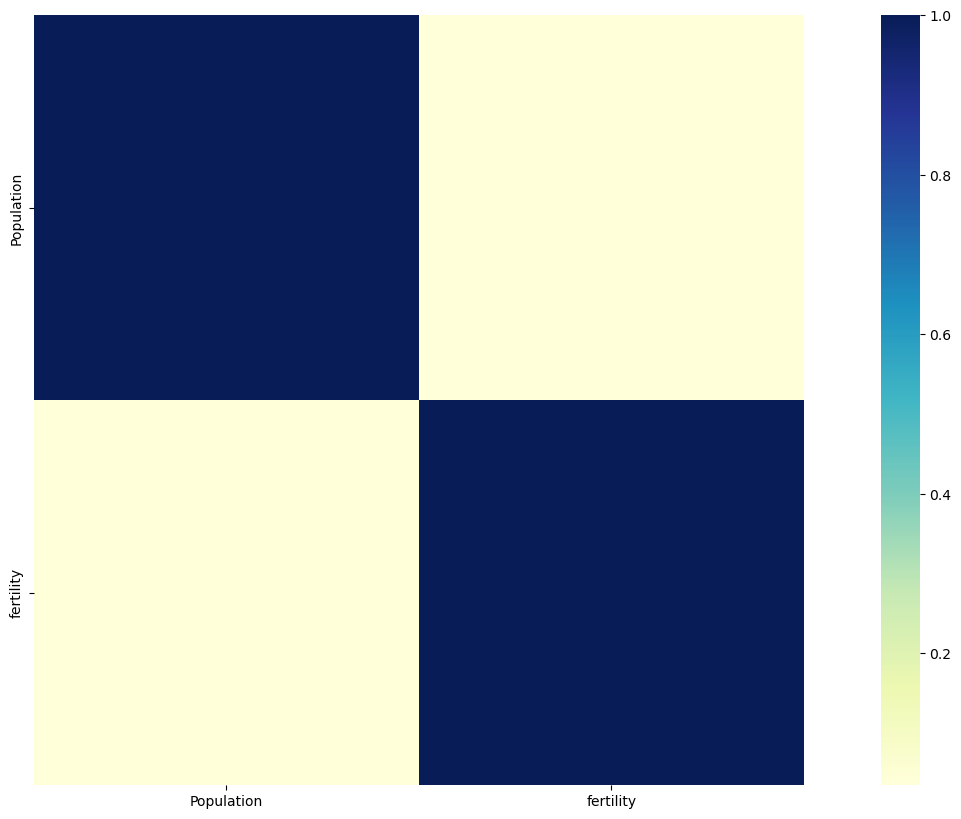

In [54]:
matrix=df_merged_3.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(matrix,vmax=1,square=True,cmap='YlGnBu')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(df_merged_3,
           x="Fertility Rate",
           y="Life Expectancy",
           animation_frame="Year",
           animation_group="Country Code",
           size="Population",
           color="Region",
           hover_name="Country Code",
           log_x=True,
           size_max=55,
           range_x=[1,10],
           range_y=[10,100])

In [ ]:
px.bar(df,
           x="Region",
           y="Population",
           animation_frame="Year",
           animation_group="Country Code",
           color="Region",
           range_y=[0,2500000000])